# <span style="color:#0b486b">Assignment 01: Machine Learning, Deep Neural Networks and CNNs</span>

## <span style="color:#0b486b">Instruction</span>

This notebook has been prepared for your to complete Assignment 1. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, including feedforward and convolutional neural networks.

## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>

The first part of this assignment is for you to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from the tutorials covered from weeks 1 to 3. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1.**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation function below, state its output range and find its derivative (show your steps)**

<span style="color:red">**(a)**</span> Sigmoid: $\sigma(x) = \frac{1}{1+\text{exp}{(-x)}}$ 

<span style="color:red">**(b)**</span> Tanh: $\sigma(x) = \frac{\exp(x) - \exp{(-x)}}{\exp(x) + \exp{(-x)}}= \frac{1-\exp(-2x)}{1+\exp(-2x)}$

**Answer**

<span style="color:red">**(a)**</span> The output range of the function is 0 to 1.

Derivative : $\frac{d}{dx} \frac{1}{1+\text{exp}{(-x)}}$ = $\frac{(1+exp(-x)) \times 0 - 1 \times \frac{d}{dx} (1 + exp(-x))}{(1+exp(-x))^2}$ = $\frac{-1 \times -1 \times exp(-x)}{(1+exp(-x))^2}$ = $\frac{exp(-x)}{(1+exp(-x))^2}$

<span style="color:red">**(b)**</span> The output range of the function is -1 to 1.

Derivative : $\frac{d}{dx} \frac{1-\text{exp}{(-2x)}}{1+\text{exp}{(-2x)}}$ = $\frac{(1+exp(-2x)) \times \frac{d}{dx} (1-exp(-2x)) - (1-exp(-2x)) \times \frac{d}{dx} (1+exp(-2x))}{(1+exp(-2x))^2}$ = $\frac{(2 \times exp(-2x) \times (1+exp(-2x)) )+ (2 \times exp(-2x) \times (1-exp(-2x)))}{(1+exp(-2x))^2}$ = $\frac{4 \times exp(-2x)}{(1+exp(-2x))^2}$

<span style="color:#0b486b"> **Numpy is going to be used in the following questions. You need to import numpy here.** </span>

In [1]:
import numpy as np

####  <span style="color:red">**Question 1.2.**</span> **Softmax activation aims to transform discriminative values to prediction probabilities. Assume that at the output layer, we obtain the logit $h^{L}$ as shown in the following cell. What is the corresonding prediction probabilities $p$? You are required to answer the formula for $p$ and write the code for computing $p$ in the following cells.**

<span style="color:red">**Provide the formula for $p$ here**</span>

p = $[\frac{exp(h_m)}{\sum_{i=1}^m exp(h_i)}]_{m=1}^M$


The following cell contains the code to generate the logit $h^L$ using your *student ID* as the seed of numpy.

In [2]:
np.random.seed(123456)
hL = np.random.rand(3,1) 
#Insert your code to compute the prediction probability here

# Transforms the values in hL to exponential forms and stores it in exp_hL
exp_hL = np.exp(hL)
# Declaring a list to store the exponential values
val_list = list()
for vals in exp_hL:
    for elements in vals:
        val_list.append(elements)
# Declaring an empty list to store the final values
final_p = list()
den = 0
for vals in val_list:
    den += vals
for vals in val_list:
    final_p.append(vals/den)

# Displaying the final results
print(final_p)

[0.2242850637082374, 0.5193956135993939, 0.2563193226923688]


####  <span style="color:red">**Question 1.3.**</span> **Linear operation and element-wise activation are two building-blocks for conducting a layer in a feedforward neural network.**

<span style="color:red">**(a)**</span> **Assume that hidden layer $1$ has value $h^1(x) \in \mathbb{R}^{2 \times 1}$ whose value will be generated randomly and the weight matrix and bias at the second layer are:**
- **$W^{2} \in \mathbb{R}^{3 \times 2}$ and $b^2 \in \mathbb{R}^{3 \times 1}$ whose values are generated randomly too.
What is the value of the hidden layer $\bar{h}^{2}(x)$ after applying *the linear operation* with the matrix $W^2$ and the bias $b^2$ over $h^1$. Provide the formula and the code in the following cells.**



<span style="color:red">**(b)**</span> **Assume that we apply *the ReLU activation function* at the second layer. What is the value of the hidden layer $h^2(x)$ after we apply the activation function? Provide the formula and the code in the following cells.** 
 


<span style="color:red">**(a) Provide the formula for $\bar{h}^{2}(x)$ here**</span>

- $\bar{h}^{2}(x) = h^1(x) \times W^2 + b^2$

In [3]:
np.random.seed(30535816)  #replace 123456 with your student ID
W2 = np.random.rand(3,2)
b2 = np.random.rand(3,1)
#Insert your code to compute h1 and h{bar}2 here
h1 = np.random.rand(2,1)
h_bar_2 = np.add(W2.dot(h1), b2)

<span style="color:red">**(b) Provide the formula for ${h}^{2}(x)$ here**</span>

- ${h}^{2}(x) = Sigmoid(\bar{h}^{2}(x)) = \frac{1}{1+exp(-\bar{h}^{2}(x))}$

In [4]:
#Insert your code to compute h2 here
h2 = 1/(1+np.exp(-h_bar_2))
#Note that we use ReLU activation function
# Defining a function to perform the operation of relu activation function
def relu(x):
    return np.maximum(0,x)
# Passing h2(x) through the activation function
h2 = relu(h2)

####  <span style="color:red">**Question 1.4.**</span> **Given the DNN architecture below for regression task. This DNN has three layers, assuming all bias terms are zero. The input layer has dimension $M$, the output layer has dimension $K$, the hidden layer has two nodes and uses *sigmoid* activation function. Assume the weight goes from $x_m$ to $h_i$ is $w^h_{im}$, and the weight goes from $h_i$ to $y_k$ is $w^o_{ki}$. Given a single training input $(x,y)$ where $y=(y_1, \ldots,y_K)$ is a vector of $K$ dimension. Answer the following questions in regarding to back propagation procedure for this network:**

<img src='Figures/dnn_reg1.png' width=230>

<span style="color:red">**(a)**</span> **What are the expressions to compute forward propagation for $h_1$, $h_2$ and $\hat{y}_k$?**

$\bar{h_1} = x_1 W_{11}^h + x_2 W_{12}^h + .... + x_m W_{1m}^h$

$ h_1 = Sigmoid(\bar{h_1}) = \frac{1}{1+exp(-\bar{h_1})}$

$\bar{h_2} = x_1 W_{21}^h + x_2 W_{22}^h + .... + x_m W_{2m}^h$

$ h_2 = Sigmoid(\bar{h_2}) = \frac{1}{1+exp(-\bar{h_2})}$

$\hat{y_k} = h_1 W_{k1}^o + h_2 W_{k2}^o$

<span style="color:red">**(b)**</span> **What are the stochastic gradient descent (SGD) update equation for $w^o_{11}$ and $w^o_{k1}$ in general for $k=1,\ldots,K$ (show your derivation) in case the mini-batch includes only $x= [x_1,...,x_M]$?**

#### Update equation for $𝑤_{11}^o$

$\hat y_1 = 𝑤_{11}^o h_1 + 𝑤_{12}^o h_2$

$J(𝑤) = \frac{1}{2} (\hat y_1-y_1)^2$

$\frac{\partial J}{\partial 𝑤_{11}^o} = \frac{\partial J}{\partial \hat y_1} \times \frac{\partial \hat y_1}{\partial 𝑤_{11}^o} = (𝑤_{11}^o h_1 + 𝑤_{12}^o h_2 - y_1) \times h_1$

$𝑤_{11}^o = 𝑤_{11}^o - \eta \times h_1 \times (𝑤_{11}^o h_1 + 𝑤_{12}^o h_2 - y_1)$



#### Update equation for $𝑤_{k1}^o$

$\hat y_k = 𝑤_{k1}^o h_1 + 𝑤_{k2}^o h_2$

$J(𝑤) = \frac{1}{2} (\hat y_k-y_k)^2$

$\frac{\partial J}{\partial 𝑤_{k1}^o} = \frac{\partial J}{\partial \hat y_k} \times \frac{\partial \hat y_k}{\partial 𝑤_{k1}^o} = (𝑤_{k1}^o h_1 + 𝑤_{k2}^o h_2 - y_k) \times h_1$

$𝑤_{11}^o = 𝑤_{11}^o - \eta \times h_1 \times (𝑤_{k1}^o h_1 + 𝑤_{k2}^o h_2 - y_k)$

<span style="color:red">**(c)**</span> **What are the stochastic gradient descent (SGD) update equation for $w^h_{11}$ and $w^h_{1m}$ in general for $m=1, \ldots, M$ (show your derivation) in case the mini-batch includes only $x= [x_1,...,x_M]$?** 

#### Update equation for $𝑤_{11}^h$

$\hat y_k = 𝑤_{k1}^o h_1 + 𝑤_{k2}^o h_2$

$J(𝑤) = \frac{1}{2} (\hat y_k-y_k)^2$

$\frac{\partial J}{\partial 𝑤_{11}^h} = \frac{\partial J}{\partial \bar h_1} \times \frac{\partial \bar h_1}{\partial 𝑤_{11}^h} = x_1 \times \frac{\partial J}{\partial \bar h_1} = x_1 \times \frac{\partial J}{\partial h_1} \times \frac{\partial h_1}{\partial \bar h_1} = x_1 \times h_1 \times (1-h_1) \times \frac{\partial J}{\partial h_1} $

$= x_1 \times h_1 \times (1-h_1) \times \frac{\partial J}{\partial \hat y_k} \times \frac{\partial \hat y_k}{\partial h_1} = x_1 \times h_1 \times (1-h_1) \times (\hat y_k - y_k) \times 𝑤_{k1}^o$

$𝑤_{11}^h = 𝑤_{11}^h - \eta \times x_1 \times h_1 \times (1-h_1) \times (\hat y_k - y_k) \times 𝑤_{k1}^o$



#### Update equation for $𝑤_{1m}^h$

$\hat y_k = 𝑤_{k1}^o h_1 + 𝑤_{k2}^o h_2$

$J(𝑤) = \frac{1}{2} (\hat y_k-y_k)^2$

$\frac{\partial J}{\partial 𝑤_{1m}^h} = \frac{\partial J}{\partial \bar h_1} \times \frac{\partial \bar h_1}{\partial 𝑤_{1m}^h} = x_m \times \frac{\partial J}{\partial \bar h_1} = x_m \times \frac{\partial J}{\partial h_1} \times \frac{\partial h_1}{\partial \bar h_1} = x_m \times h_1 \times (1-h_1) \times \frac{\partial J}{\partial h_1} $

$= x_m \times h_1 \times (1-h_1) \times \frac{\partial J}{\partial \hat y_k} \times \frac{\partial \hat y_k}{\partial h_1} = x_m \times h_1 \times (1-h_1) \times (\hat y_k - y_k) \times 𝑤_{k1}^o$

$𝑤_{1m}^h = 𝑤_{1m}^h - \eta \times x_m \times h_1 \times (1-h_1) \times (\hat y_k - y_k) \times 𝑤_{k1}^o$


<span style="color:red">**(d)**</span> **What are the stochastic gradient descent (SGD) update equation for $w^h_{im}$ in general for $i=1,2$ and $m=1, \ldots, M$ (show your derivation) in case the mini-batch includes only $x= [x_1,...,x_M]$?**

#### Update equation for $𝑤_{im}^h$

$\hat y_k = 𝑤_{k1}^o h_1 + 𝑤_{k2}^o h_2$

$J(𝑤) = \frac{1}{2} (\hat y_k-y_k)^2$

$\frac{\partial J}{\partial 𝑤_{im}^h} = \frac{\partial J}{\partial \bar h_i} \times \frac{\partial \bar h_i}{\partial 𝑤_{im}^h} = x_m \times \frac{\partial J}{\partial \bar h_i} = x_m \times h_i \times (1-h_i) \times \frac{\partial J}{\partial h_i} $

$= x_m \times h_i \times (1-h_i) \times \frac{\partial J}{\partial \hat y_k} \times \frac{\partial \hat y_k}{\partial h_i} = x_m \times h_i \times (1-h_i) \times (\hat y_k - y_k) \times 𝑤_{ki}^o$

$𝑤_{im}^h = 𝑤_{im}^h - \eta \times x_m \times h_i \times (1-h_i) \times (\hat y_k - y_k) \times 𝑤_{ki}^o$


## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>

**The second part of this assignment is for you to demonstrate your basis knowledge in TF 1.x and feedforward neural networks that you have acquired from the lectures and tutorials materials.**

**In the second part of this assignment, you are going to work with the `FashionMNIST` dataset for `image recognition task`. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST.**

####  <span style="color:red">**Question 2.1.**</span> Load the Fashion MNIST using Keras datasets

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [5]:
import tensorflow as tf
from tensorflow import keras

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full_img.shape

(60000, 28, 28)

The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [8]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
X_train_full = X_train_full_img.reshape(num_train,-1)/255.0
X_test = X_test_img.reshape(num_test, -1)/255.0
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


####  <span style="color:red">**Question 2.2.**</span> Preprocess the dataset and split into training, validation, and testing datasets

You need to write the code to address the following requirements:
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the piels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

In [9]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, y_train = X_train_full[0:i], y_train_full[0:i] 
X_valid, y_valid = X_train_full[i:], y_train_full[i:]
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

You have now the separate training, validation, and testing sets for training your model.

####  <span style="color:red">**Question 2.3.**</span> Visualize some images in the training set with labels

You are required to write the code to show the first $36$ images in X_train_full_img (which is an array of images) with labels as shown in the following figure. Note that the class names of Fashion MNIST are as follows 
- "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"

<img src="Figures/Fashion_MNIST.png" width="350" align="center"/>

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

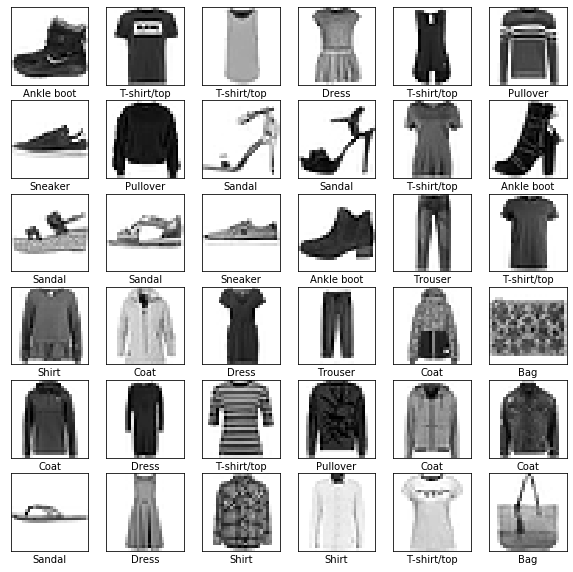

In [11]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

####  <span style="color:red">**Question 2.4.**</span> Write code for the dense layer

We now develop a feed-forward neural networks with the architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(softmax)$. We first declare the code for the hidden layer with a linear operation and activation. Since we are implementing using TF 1.x syntax, we first import the compatible version of TF 1.x in TF 2.x.

In [12]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL [3 marks]
import numpy as np

def dense_layer(x, num_neurons, name, activation=None):
    with tf.name_scope(name):
        num_inputs = int(x.get_shape()[1])
        stddev = 2 / np.sqrt(num_inputs)
        init = tf.truncated_normal([num_inputs, num_neurons], stddev=stddev)
        b_init = tf.truncated_normal([num_neurons], stddev = stddev)
        W = tf.Variable(init, name='W')
        b = tf.Variable(b_init, name='b')
        z = tf.matmul(x,W) + b
    if activation == "sigmoid":
        return 1/(1+np.exp(-z))
    elif activation == "relu":
        return max(0,z)
    else:
        return z

####  <span style="color:red">**Question 2.5.**</span> Declare your network and visualize quantities of interest using TensorBoard

It is the time to implement your network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(softmax)$. Note that we need to store and visualize the following quantities using TensorBoard:
- Gradients of trainable variables (weight matrices and biases) (Hint: use method `compute_gradients` with respect to the loss function). 
- Hidden layers 1 and 2.

In [14]:
num_hidden1 = 20
num_hidden2 = 25
num_outputs = 10
num_inputs = 784  #28 x 28

*Run the following cell to create necessary subfolders for this assignment. You must **not** modify these codes and **must** run it first*.

In [15]:
# Create necessary subfolders to store immediate files for this assignment.

import os
if not os.path.exists("./models/dnn0"):
    os.makedirs("models/dnn0")

In [16]:
inputs = tf.placeholder(tf.float32, shape=[None, num_inputs], name="inputs") 
labels = tf.placeholder(tf.int32, shape=[None], name="labels") 

with tf.name_scope("dnn"):
    hidden1 = dense_layer(inputs, num_hidden1, name='layer1', activation=tf.nn.relu)
    hidden2 = dense_layer(hidden1, num_hidden2, name='layer2', activation=tf.nn.relu)
    logits = dense_layer(hidden2, num_outputs, name='logits')
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits, name='xentropy')
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("evaluation"):
    correct =  tf.nn.in_top_k(logits, labels, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("train"):
    learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    grads = optimizer.compute_gradients(loss)
    training_op = optimizer.apply_gradients(grads)
    
    for var in tf.trainable_variables():
        tf.summary.histogram(var.op.name + "/values", var)
        
    for grad, var in grads:
        if grad is not None:
            tf.summary.histogram(var.op.name + "/gradients", grad)

# summary
accuracy_summary = tf.summary.scalar("accuracy", accuracy)


In [17]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# merge all summary
tf.summary.histogram('hidden1/activations', hidden1)
tf.summary.histogram('hidden2/activations', hidden2)
merged = tf.summary.merge_all()

init = tf.global_variables_initializer()
saver = tf.train.Saver()

train_writer = tf.summary.FileWriter("models/dnn0/train", tf.get_default_graph())
test_writer = tf.summary.FileWriter("models/dnn0/test", tf.get_default_graph())

num_epochs = 50
batch_size = 128

####  <span style="color:red">**Question 2.6.**</span> Train your network and report the resutls, and inspect the computational graph and visualize the gradients, hidden layers 1,2

The **first** part of this sub-question requires you to write codes in the following cell.

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

with tf.Session() as sess:
    init.run()
    print("Epoch\tTrain accuracy\tValid accuracy")
    for epoch in range(num_epochs):
        for idx_start in range(0, X_train.shape[0], batch_size):
            idx_end = min(X_train.shape[0], idx_start + batch_size)#Insert your code here
            X_batch, y_batch = X_train[idx_start:idx_end], y_train[idx_start:idx_end]#Insert your code here
            sess.run(training_op, feed_dict={inputs: X_batch, labels: y_batch})
            
        summary_train, acc_train = sess.run([merged, accuracy],feed_dict={inputs:X_train,labels:y_train})#Insert your code here
        summary_valid, acc_valid = sess.run([merged, accuracy],feed_dict={inputs:X_valid,labels:y_valid})#Insert your code here
        
        train_writer.add_summary(summary_train, epoch)
        test_writer.add_summary(summary_valid, epoch)
        
        print("{}\t{}\t{}".format(epoch, acc_train, acc_valid))

    save_path = saver.save(sess, "models/dnn0.ckpt")

Epoch	Train accuracy	Valid accuracy
0	0.6582592725753784	0.6623333096504211
1	0.7408703565597534	0.7490000128746033
2	0.7658888697624207	0.7726666927337646
3	0.7824814915657043	0.7836666703224182
4	0.7955185174942017	0.7951666712760925
5	0.8047778010368347	0.8058333396911621
6	0.8123148083686829	0.8146666884422302
7	0.8171296119689941	0.8153333067893982
8	0.8217407464981079	0.8191666603088379
9	0.8251296281814575	0.8211666941642761
10	0.8287962675094604	0.8230000138282776
11	0.8324074149131775	0.824833333492279
12	0.8351481556892395	0.8276666402816772
13	0.8372407555580139	0.8296666741371155
14	0.8392407298088074	0.8306666612625122
15	0.8415185213088989	0.8338333368301392
16	0.8428148031234741	0.8338333368301392
17	0.8445925712585449	0.8348333239555359
18	0.8459259271621704	0.8358333110809326
19	0.8472037315368652	0.8374999761581421
20	0.8486666679382324	0.8381666541099548
21	0.8502222299575806	0.8391666412353516
22	0.8513148427009583	0.8410000205039978
23	0.8522592782974243	0.84216666

The **second** part of this subquestion requires you use the Tensorboard, find out relevant visualizations and input them into the markdown cell below. (***Hint***: A software to capture the screen such as *Snipping Tools* in *Windows* may help).

<span style="color:red">**YOU ARE REQUIRED TO INSERT YOUR OWN GRAPHICS IN THIS MARKDOWN CELL**</span>

* **Hidden activations**: 

First hidden layer | Second hidden layer
:-: | :-:
![alt text](layer1.png)| ![alt text](layer2.png)
 
* **Parameter gradients**: 

First weight layer | Second weight layer | Last weight layer
:-: | :-: | :-:
![alt text](layer1_para.png) | ![alt text](layer2_para.png) | ![alt text](final_layer_para.png)


## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**This part of the asssignment is designed to access your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $2000$ images of cats, dogs, fishes and lions, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1t5b-pNMK5-uIK6wZIIHBluLY7tPK0JzV/view?usp=sharing) and then decompress to the folder the folder `datasets\Animals` for you in the assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals. A module <span style="color:red">models.py</span>, is to be used, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also help generate next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement to build the CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [19]:
%load_ext autoreload
%autoreload 2

In [20]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [21]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [22]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process our experimental data. 

In [23]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

cats 12500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 12500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500


Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [24]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(1600, 32, 32, 3) (1600,)
(200, 32, 32, 3) (200,)
(200, 32, 32, 3) (200,)
['cats' 'dogs' 'fishes' 'lions']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [25]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [26]:
network1.build_cnn()
network1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_______________________________________

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [27]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3924 - acc: 0.2713 - val_loss: 1.3850 - val_acc: 0.2700
Epoch 2/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3813 - acc: 0.2788 - val_loss: 1.3878 - val_acc: 0.2450
Epoch 3/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3779 - acc: 0.2706 - val_loss: 1.3978 - val_acc: 0.2250
Epoch 4/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3948 - acc: 0.2725 - val_loss: 1.3894 - val_acc: 0.2450
Epoch 5/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3787 - acc: 0.2562 - val_loss: 1.3623 - val_acc: 0.2950
Epoch 6/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3895 - acc: 0.2569 - val_loss: 1.3886 - val_acc: 0.2300
Epoch 7/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3852 - acc: 0.2738 - val_loss: 1.3947 - val_acc: 0.2250
E

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [28]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 1ms/sample - loss: 1.3873 - acc: 0.2450


0.245

Below shows how you can inspect the training progress.

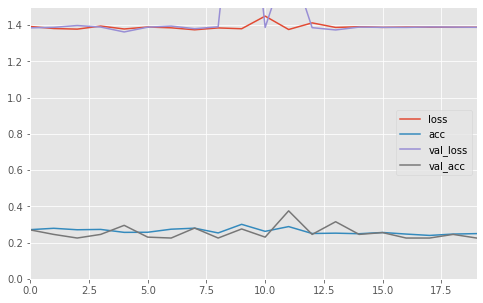

In [29]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [30]:
network1.predict(data_manager.X_test[0:10])

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 432x288 with 0 Axes>

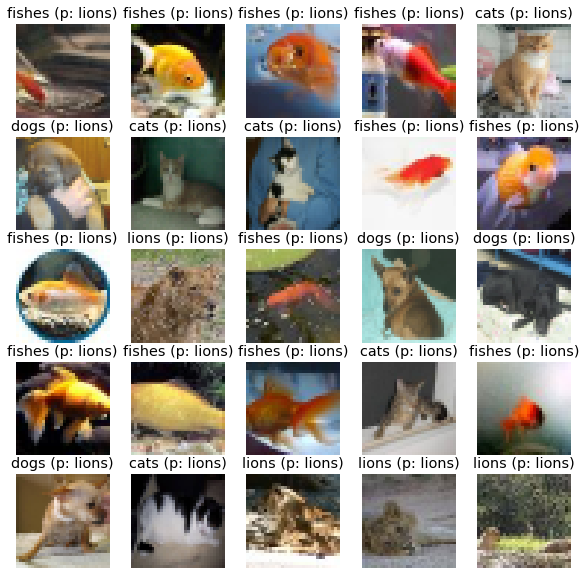

In [31]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red">**Question 3.1.**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? what would you do to improve it?). Write your answer below.**

<span style="color:#0b486b"> *#Your answer and observation here* </span>


From the graph above, one can observe that the model did not learn well as the loss is more and the accuracy is less. Possible reasons include covariate shifts, overfitting etc. Inorder to improve this, techniques such as batch normalisation or dropout could be used.


<span style="color:red">**Question 3.2.**</span> **Normally the first parameter to tune in Deep Learning is learning rate. In this question, you'll try running the default model with different learning rates (recommended in the list $[0.0001, 0.001, 0.005, 0.01]$) by entering the value in the cell below and run it. You should write your own code below for this learning rate tuning. Note that you can set the attribute `verbose` of the `DefaultModel` class to `False` for keeping the training silently without showing its details. Report the learning rates you tried along with the validation accuracy for each learning rate. What is the final learning rate that you'll use? Why?**

In [32]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)
network1.build_cnn()
network1.summary()
network1.fit(data_manager, batch_size = 64, num_epochs = 20)
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_3 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

0.245

In [33]:
#Write your code for tuning here

rates = [0.0001,0.001,0.005,0.01]
for val in rates:
    network_new = DefaultModel(name='network_new',num_classes = len(data_manager.classes),optimizer='sgd',batch_size = 128, num_epochs = 20, learning_rate=val, verbose=False)
    network_new.build_cnn()
    network_new.fit(data_manager, batch_size=64, num_epochs=20)
    network_new.compute_accuracy(data_manager.X_test,data_manager.y_test)

200/200 [==============================] - 0s 1ms/sample - loss: 0.8858 - acc: 0.6400


<span style="color:#0b486b"> *#Your answer and observation here* </span>

It was observed that the maximum accuracy was obtained when the learning rate was 0.01. So, it can be concluded that the highest learning rate gave the best accuracy.




**For question 3.3 to 3.6, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures as well as parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

<span style="color:red">**Question 3.3.**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method for the `YourModel` class from the cell below which is inherited from the `DefaultModel` class.**

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
class YourModel(DefaultModel):
    def __init__(self,
                 name='network2',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate, verbose)
        self.model = models.Sequential()
        self.feature_maps = [feature_maps * (1 << i) for i in range(num_blocks)]
        if optimizer == 'adam':
            self.optimizer = keras.optimizers.Adam(learning_rate)
        elif optimizer == 'nadam':
            self.optimizer = keras.optimizers.Nadam(learning_rate)
        elif optimizer == 'adagrad':
            self.optimizer = keras.optimizers.Adagrad(learning_rate)
        elif optimizer== 'rmsprop':
            self.optimizer = keras.optimizers.RMSprop(learning_rate)
        elif optimizer == 'adadelta':
            self.optimizer = keras.optimizers.Adadelta(learning_rate)
        else:
            self.optimizer = keras.optimizers.SGD(learning_rate)
    
    def build_cnn(self):
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(32, (3,3), strides = (1,1), padding='same', activation=self.activation_func, input_shape=(32,32,3)))
        if self.batch_norm == True:
            self.model.add(layers.BatchNormalization())
        self.model.add(layers.Activation(activation=self.activation_func))
        self.model.add(layers.Conv2D(32, (3,3), strides = (1,1), padding='same', activation=self.activation_func))
        if self.batch_norm == True:
            self.model.add(layers.BatchNormalization())
        self.model.add(layers.Activation(activation=self.activation_func))
        self.model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
        self.model.add(layers.Dropout(rate = self.drop_rate))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<span style="color:red">**Question 3.4.**</span> **Once writing your own models, you should be able to use it to experiment with dropout or batch normalization. In this question, you'll use your model to finetune the dropout rate. Report the `drop_rate` rates you tried along with the validation accuracy for each rate (recomended range: 0.2 to 0.5). What is
the final `drop_rate` rate that you'll use? Did dropout improve performance? Did it help reduce overfitting? Note that in this experiment, you should set `batch_norm` to `None`, meaning that we do not use the batch normalization.**

<span style="color:#0b486b"> #*Write your answer and observation here* </span>



In [36]:
rates = [0.2,0.3,0.4,0.5]
for val in rates:
    network_2 = YourModel(name='network_2',num_classes = len(data_manager.classes),optimizer='sgd',batch_size = 128, num_epochs = 20, learning_rate=0.01, drop_rate=val, batch_norm=None, verbose = False)
    network_2.build_cnn()
    network_2.fit(data_manager, batch_size=64, num_epochs=20)
    network_2.compute_accuracy(data_manager.X_test,data_manager.y_test)

200/200 [==============================] - 0s 670us/sample - loss: 0.8699 - acc: 0.6150


From the values above, one can observe that the highest accuracy has been recorded when drop rate is 0.3. Therefore, it can be said that dropout improves the performance in this case by helping in reducing overfitting.

In [37]:
drop_out_network = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.5,
                     batch_norm=None,     
                     optimizer='adam',
                     learning_rate= 0.001)
drop_out_network.build_cnn()
drop_out_network.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_16 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 8192)            

<span style="color:red">**Question 3.5.**</span> **Now, let's try using batch normalization. What is the validation and test result? Does it improve the model? How does it compare to the model using dropout? To have a fair comparison, in this experiment, we set `drop_rate=0` to not use the dropout.**

In [38]:
batch_norm_network = YourModel(name='network4',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001)
batch_norm_network.build_cnn()
batch_norm_network.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_17 (Averag (None, 16, 16, 32)      

In [39]:
drop_out_network.compute_accuracy(data_manager.X_test,data_manager.y_test)
batch_norm_network.compute_accuracy(data_manager.X_test,data_manager.y_test)

200/200 [==============================] - 0s 2ms/sample - loss: 1.3975 - acc: 0.2900


0.29

From the values above, it is evident that using batch normalization improves the model and test result as the model which used batch normalisation showed more accuracy and less loss compared to the model with dropout and without batch normalisation.

<span style="color:red">**Question 3.6.**</span> **Finally, you should try to train the best model by trying different configurations for `num_blocks`, `feature_maps`, `optimizer`, `learning_rate`, `batch_size`, `keep_prob` and `batch_norm`. Briefly report the experiments that you try and your observation in the answer below. Also, run the cells below with the best configuration you found.**

<span style="color:#0b486b"> #*Write your answer and discussion here* </span>

......

In [40]:
# Code for computing parameters for first variation
variation_1 = YourModel(name='variation_1',num_classes = len(data_manager.classes),optimizer='sgd', num_blocks= 4,
                          batch_size = 64, feature_maps=64, num_epochs = 20, learning_rate=0.005, drop_rate=0.4, batch_norm=None, 
                          verbose = False)
variation_1.build_cnn()
variation_1.fit(data_manager, batch_size=64, num_epochs=20)
variation_1.compute_accuracy(data_manager.X_test,data_manager.y_test)
# Code for computing parameters for second variation
variation_2 = YourModel(name='variation_2',num_classes = len(data_manager.classes),optimizer='adam', num_blocks= 4,
                          batch_size = 128, feature_maps=32, num_epochs = 20, learning_rate=0.01, drop_rate=0.5, batch_norm=None, 
                          verbose = False)
variation_2.build_cnn()
variation_2.fit(data_manager, batch_size=64, num_epochs=20)
variation_2.compute_accuracy(data_manager.X_test,data_manager.y_test)
# Code for computing parameters for third variation
variation_3 = YourModel(name='variation_3',num_classes = len(data_manager.classes),optimizer='adam', num_blocks= 4,
                          batch_size = 64, feature_maps=64, num_epochs = 20, learning_rate=0.005, drop_rate=0.4, batch_norm=True, 
                          verbose = False)
variation_3.build_cnn()
variation_3.fit(data_manager, batch_size=64, num_epochs=20)
variation_3.compute_accuracy(data_manager.X_test,data_manager.y_test)
# Code for computing parameters for fourth variation
variation_4 = YourModel(name='variation_4',num_classes = len(data_manager.classes),optimizer='sgd', num_blocks= 2,
                          batch_size = 128, feature_maps=32, num_epochs = 20, learning_rate=0.01, drop_rate=0.5, batch_norm=None, 
                          verbose = False)
variation_4.build_cnn()
variation_4.fit(data_manager, batch_size=64, num_epochs=20)
variation_4.compute_accuracy(data_manager.X_test,data_manager.y_test)
# Code for computing parameters for fifth variation
variation_5 = YourModel(name='variation_5',num_classes = len(data_manager.classes),optimizer='adagrad', num_blocks= 4,
                          batch_size = 128, feature_maps=32, num_epochs = 20, learning_rate=0.01, drop_rate=0.5, batch_norm=None, 
                          verbose = False)
variation_5.build_cnn()
variation_5.fit(data_manager, batch_size=64, num_epochs=20)
variation_5.compute_accuracy(data_manager.X_test,data_manager.y_test)

200/200 [==============================] - 0s 715us/sample - loss: 0.8671 - acc: 0.6300
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
200/200 [==============================] - 0s 695us/sample - loss: 0.8392 - acc: 0.6900


0.69

It can be seen from the results above that, higher parameter values such as learning rate and learning rate gives more accuracy. Correctly chosen value of drop rate will also help in boosting the performance of the model. Out of the optimizers used, adagrad gives more accuracy followed by adam and sgd. Also, enabling batch normalisation also played a major role in the performance boost of the model.

--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**